In [3]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("peach_spectra_brix.csv",sep=",")
df.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,...,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,...,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,...,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,...,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,...,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,...,0.719793,0.718875,0.716860,0.713771,0.709577,0.704232,0.697717,0.689882,0.680748,0.670263


In [5]:
print(f"Number of rows {df.shape[0]} and number of columns {df.shape[1]}")

Number of rows 50 and number of columns 601


The above result shows that dataset has 50 rows (N) and 601 columns (p). It is a high dimensional data as p>>N. The dimension of the data should be reduced. The lowest dimension is expected to yield lowest MSE. We need to do simulation to find the lowest dimension.

In [6]:
y = df["Brix"]
x = df.drop("Brix",axis=1)

In [15]:
def PLS_CV(X,y,number_components,plot_components=True,verbose=True):
    MSE = []
    n_component = np.arange(0,number_components)
    for i in n_component:
        pls = PLSRegression(n_components=i+1)
        y_cv = cross_val_predict(pls,x,y,cv=10)
        MSE.append(mean_squared_error(y,y_cv))
        comp= int(i+1)*100/number_components
        if verbose:
            print(f"{comp}% completed | MSE = {MSE[i-1]} ")
    if verbose:
        MSE_MIN = np.argmin(MSE)
        print(f"\n\n Minimum MSE obtained at {MSE_MIN} \n")
    if plot_components:
        plt.plot(n_component,np.array(MSE),'-v',color='b')
        plt.plot(n_component[MSE_MIN],MSE[MSE_MIN],'+',color='r',ms=10)
        plt.title("Partial Least Square Regression (PLS)",fontweight="bold")
        plt.xlabel("Partial Least Square Components")
        plt.ylabel("MSE")
        plt.show()
        
    pls_opt = PLSRegression(MSE_MIN+1)
    pls_opt.fit(X,y)
    predicted = pls_opt.predict(X)
    ycv = cross_val_predict(pls_opt,X,y,cv=10)
    rsquare = r2_score(y,predicted)
    rsquarecv = r2_score(y,ycv)
    mse = mean_squared_error(y,predicted)
    msecv = mean_squared_error(y,ycv)
    print(f"R-Square {rsquare}")
    print(f"R-SquareCV {rsquarecv}")
    print(f"MSE {mse}")
    print(f"MSECV {msecv}")
    
    plt.scatter(predicted,y,color="r",edgecolor="k",alpha=0.5)
    plt.show()
    

2.5% completed | MSE = 5.940885184351975 
5.0% completed | MSE = 5.940885184351975 
7.5% completed | MSE = 5.075698862992619 
10.0% completed | MSE = 3.84108798867216 
12.5% completed | MSE = 3.2933856351325885 
15.0% completed | MSE = 2.892201541865217 
17.5% completed | MSE = 2.7043335459496354 
20.0% completed | MSE = 2.7654169021356534 
22.5% completed | MSE = 2.9038247820731518 
25.0% completed | MSE = 3.034705721517773 
27.5% completed | MSE = 3.358180117460062 
30.0% completed | MSE = 3.524355170295278 
32.5% completed | MSE = 3.9849955243395665 
35.0% completed | MSE = 3.5785474054676767 
37.5% completed | MSE = 3.01218376114618 
40.0% completed | MSE = 3.1857817328333504 
42.5% completed | MSE = 3.632490847658283 
45.0% completed | MSE = 3.554204441704043 
47.5% completed | MSE = 3.4560589927417182 
50.0% completed | MSE = 3.543915790545322 
52.5% completed | MSE = 3.6943443261510756 
55.0% completed | MSE = 4.021967993361531 
57.5% completed | MSE = 4.253794254901935 
60.0% c

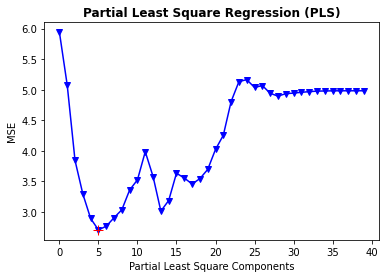

R-Square 0.6058287425378823
R-SquareCV 0.4196091373782198
MSE 1.8366425508297675
MSECV 2.7043335459496354


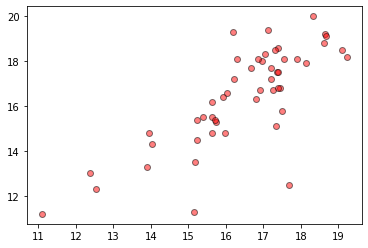

In [16]:
PLS_CV(x,y,40)